In [1]:
# CPU/GPU Toggle

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [2]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [3]:
# Import Keras 

import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [4]:
# Load CIFAR-10 Dataset

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  train_features.shape
num_classes = len(np.unique(train_labels))

170426368/170498071 [============================>.] - ETA: 0s

In [5]:
# Test Data Toggle

view_data = False

In [6]:
# Test Data Import

if view_data:
    class_names = ['airplane','automobile','bird','cat','deer',
                   'dog','frog','horse','ship','truck']
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(train_labels[:]==i)[0]
        features_idx = train_features[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num,::], (1, 2, 0))
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

In [7]:
# Performance Logging

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [8]:
# Data Pre-Processing

train_features = train_features.astype('float32')/255.0
test_features = test_features.astype('float32')/255.0

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
# Model Parameters
input_shape = (img_channels, img_rows, img_cols)
kernel_size = 3
pool_size = 2
strides = 3
conv_depth_1 = 64
conv_depth_2 = 128
lr = 0.01
loss = 'categorical_crossentropy'
optimizer = SGD(lr=lr)
metrics = ['accuracy']
batch_size = 128
epochs = 50
verbose = 2 # 0 - no logging, 1 - progress bar, 2 - line per epoch

In [10]:
print(input_shape)

(3, 32, 32)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 32)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 16, 16)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 128, 16, 16)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 8, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
__________

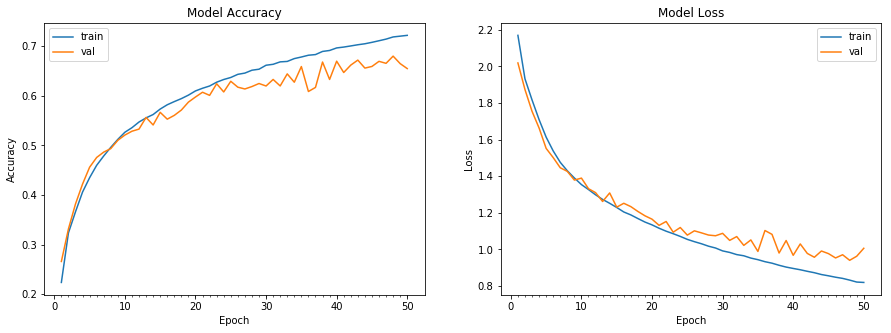

Model took 1614.13 seconds to train
Accuracy on test data is: 65.49


In [11]:
# Define the model

model = Sequential()

model.add(Conv2D(conv_depth_1, (kernel_size, strides), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(conv_depth_2, (kernel_size, strides), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
print(model.summary())

# Train the model
start = time.time()

model_info = model.fit(train_features, train_labels, 
                       batch_size=batch_size, epochs=epochs, 
                       validation_data = (test_features, test_labels), 
                       verbose=verbose)
end = time.time()

# plot model history
plot_model_history(model_info)
print("Model took %0.2f seconds to train" % (end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f" % accuracy(test_features, test_labels, model))